# **CREDIT CARD USERS SEGEMENTATION**

## **Project Overview:**
We want to categorize our credit card users based on their spending habits, payment behavior, and overall credit usage. 

The goal is to identify different types of customers so we can offer more personalized services, improve customer satisfaction, and optimize our marketing strategies.

## **Objectives**

- Analyze Customer Data – Review the dataset and identify key trends in how our customers use their credit cards.

- Group Customers into Segments – Use data-driven methods to categorize customers into groups based on their behavior.

- Provide Insights & Recommendations – Explain what these segments mean for our business and how we can better serve each group.

- Deliver a Clear Report & Presentation – Summarize your findings in a way that is easy for non-technical stakeholders to understand.

In [1]:
url = r"C:\Users\user\Desktop\Projects\Cluster Project (Card)\Customer-Data - 2.csv"

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv(url)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [8]:
df.duplicated().any()  ## checking for duplicated rows 

False

In [9]:
df.isna().any()  ## checking for null values 

cust_id                             False
balance                             False
balance_frequency                   False
purchases                           False
oneoff_purchases                    False
installments_purchases              False
cash_advance                        False
purchases_frequency                 False
oneoff_purchases_frequency          False
purchases_installments_frequency    False
cash_advance_frequency              False
cash_advance_trx                    False
purchases_trx                       False
credit_limit                         True
payments                            False
minimum_payments                     True
prc_full_payment                    False
tenure                              False
dtype: bool

In [17]:
df.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

In [11]:
df.describe().T  ## statistical summary 

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204822,2136.634780,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [16]:
df['credit_limit'].fillna(df['credit_limit'].median(), inplace = True)  ## filling the missing values in credit limit with the median value 
df['minimum_payments'].fillna(df['minimum_payments'].median(), inplace = True)  ## filling the missing values in minimum payments with the median value 


In [19]:
features = ['cust_id', 'purchases', 'payments', 'tenure','oneoff_purchases', 'minimum_payments', 'balance', 'credit_limit']

In [20]:
df2 = df[features]
df2

,cust_id,purchases,payments,tenure,oneoff_purchases,minimum_payments,balance,credit_limit
0,C10001,95.40,201.802084,12,0.00,139.509787,40.900749,1000.0
1,C10002,0.00,4103.032597,12,0.00,1072.340217,3202.467416,7000.0
2,C10003,773.17,622.066742,12,773.17,627.284787,2495.148862,7500.0
3,C10004,1499.00,0.000000,12,1499.00,312.343947,1666.670542,7500.0
4,C10005,16.00,678.334763,12,16.00,244.791237,817.714335,1200.0
...,...,...,...,...,...,...,...,...
8945,C19186,291.12,325.594462,6,0.00,48.886365,28.493517,1000.0
8946,C19187,300.00,275.861322,6,0.00,312.343947,19.183215,1000.0
8947,C19188,144.40,81.270775,6,0.00,82.418369,23.398673,1000.0
8948,C19189,0.00,52.549959,6,0.00,55.755628,13.457564,500.0


In [21]:
rfm_df = df.groupby('cust_id').agg(
    Total_Purchase = ('purchases', 'sum'),
    Total_Payments = ('payments', 'sum'),
    Tenure = ('tenure', 'max'),
    One_Off = ('oneoff_purchases', 'mean'),
    Minimum_Payments = ('minimum_payments', 'mean'),
    Balance = ('balance', 'mean'),
    Credit = ('credit_limit', 'mean')
)

In [22]:
rfm_df

,Total_Purchase,Total_Payments,Tenure,One_Off,Minimum_Payments,Balance,Credit
cust_id,,,,,,,
C10001,95.40,201.802084,12,0.00,139.509787,40.900749,1000.0
C10002,0.00,4103.032597,12,0.00,1072.340217,3202.467416,7000.0
C10003,773.17,622.066742,12,773.17,627.284787,2495.148862,7500.0
C10004,1499.00,0.000000,12,1499.00,312.343947,1666.670542,7500.0
C10005,16.00,678.334763,12,16.00,244.791237,817.714335,1200.0
...,...,...,...,...,...,...,...
C19186,291.12,325.594462,6,0.00,48.886365,28.493517,1000.0
C19187,300.00,275.861322,6,0.00,312.343947,19.183215,1000.0
C19188,144.40,81.270775,6,0.00,82.418369,23.398673,1000.0


In [30]:
## Correlation Analysis 
corr_matrix = rfm_df.corr()
corr_matrix

,Total_Purchase,Total_Payments,Tenure,One_Off,Minimum_Payments,Balance,Credit
Total_Purchase,1.000000,0.603264,0.086288,0.916845,0.095789,0.181261,0.356977
Total_Payments,0.603264,1.000000,0.106136,0.567292,0.128960,0.322802,0.421876
Tenure,0.086288,0.106136,1.000000,0.064150,0.060006,0.072692,0.139222
One_Off,0.916845,0.567292,0.064150,1.000000,0.050256,0.164350,0.319735
Minimum_Payments,0.095789,0.128960,0.060006,0.050256,1.000000,0.397920,0.126765
Balance,0.181261,0.322802,0.072692,0.164350,0.397920,1.000000,0.531296
Credit,0.356977,0.421876,0.139222,0.319735,0.126765,0.531296,1.000000


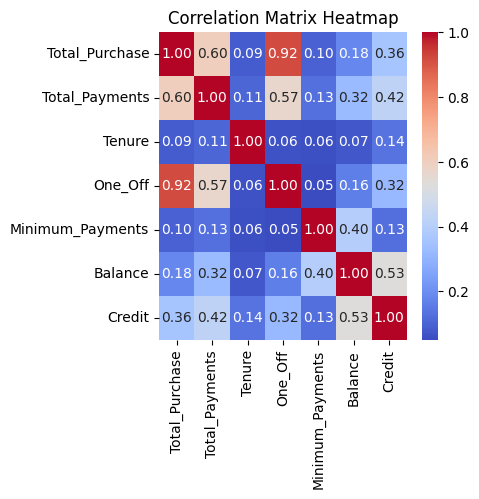

In [35]:
plt.figure(figsize=(4, 4))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("Correlation Matrix Heatmap")
plt.show()

In [45]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(rfm_df)

In [46]:
scaled_df

array([[-0.42489973, -0.52897879,  0.36067954, ..., -0.3024    ,
        -0.73198937, -0.9603784 ],
       [-0.46955188,  0.81864213,  0.36067954, ...,  0.09749953,
         0.78696085,  0.68867844],
       [-0.10766823, -0.38380474,  0.36067954, ..., -0.0932934 ,
         0.44713513,  0.82609984],
       ...,
       [-0.40196519, -0.5706145 , -4.12276757, ..., -0.32687479,
        -0.7403981 , -0.9603784 ],
       [-0.46955188, -0.58053567, -4.12276757, ..., -0.33830497,
        -0.74517423, -1.0977998 ],
       [ 0.04214581, -0.57686873, -4.12276757, ..., -0.3243581 ,
        -0.57257511, -0.90540984]])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

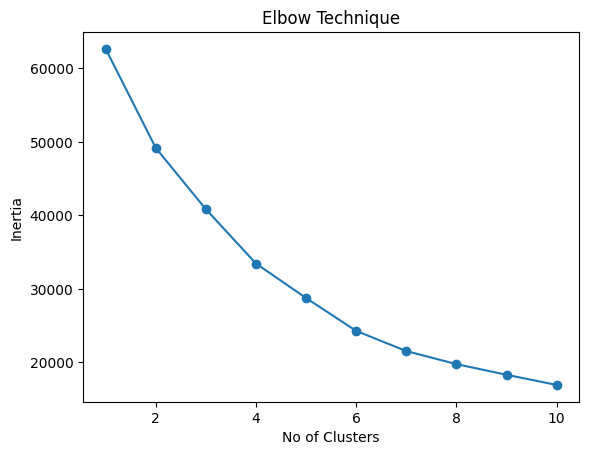

In [48]:
wss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(scaled_df)
    wss.append(kmeans.inertia_)

plt.plot(k_range, wss, marker = 'o')
plt.title('Elbow Technique')
plt.ylabel('Inertia')
plt.xlabel('No of Clusters')
plt.show()

In [51]:
kmeans = KMeans(n_clusters = 4).fit(scaled_df)
rfm_df['Labels'] = kmeans.labels_ + 1

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
rfm_df

,Total_Purchase,Total_Payments,Tenure,One_Off,Minimum_Payments,Balance,Credit,Labels
cust_id,,,,,,,,
C10001,95.40,201.802084,12,0.00,139.509787,40.900749,1000.0,4
C10002,0.00,4103.032597,12,0.00,1072.340217,3202.467416,7000.0,3
C10003,773.17,622.066742,12,773.17,627.284787,2495.148862,7500.0,4
C10004,1499.00,0.000000,12,1499.00,312.343947,1666.670542,7500.0,4
C10005,16.00,678.334763,12,16.00,244.791237,817.714335,1200.0,4
...,...,...,...,...,...,...,...,...
C19186,291.12,325.594462,6,0.00,48.886365,28.493517,1000.0,1
C19187,300.00,275.861322,6,0.00,312.343947,19.183215,1000.0,1
C19188,144.40,81.270775,6,0.00,82.418369,23.398673,1000.0,1


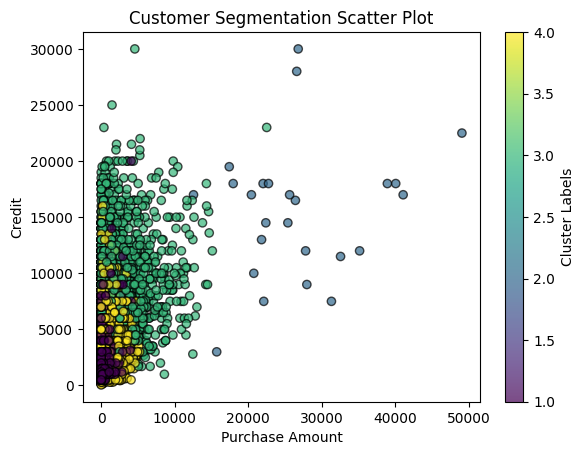

In [62]:
plt.scatter(rfm_df['Total_Purchase'], rfm_df['Credit'], c=rfm_df['Labels'], cmap='viridis', alpha=0.7, edgecolors='k')

# Labeling the plot
plt.xlabel('Purchase Amount')
plt.ylabel('Credit')
plt.title('Customer Segmentation Scatter Plot')
plt.colorbar(label='Cluster Labels')
plt.show()

In [63]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Purchase,8950.0,1003.204822,2136.634780,0.000000,39.635000,361.280000,1110.130000,49039.57000
Total_Payments,8950.0,1733.143852,2895.063757,0.000000,383.276166,856.901546,1901.134317,50721.48336
Tenure,8950.0,11.517318,1.338331,6.000000,12.000000,12.000000,12.000000,12.00000
One_Off,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
Minimum_Payments,8950.0,844.906767,2332.792322,0.019163,170.857654,312.343947,788.713501,76406.20752
Balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
Credit,8950.0,4494.282473,3638.646702,50.000000,1600.000000,3000.000000,6500.000000,30000.00000
Labels,8950.0,3.563017,0.868230,1.000000,3.000000,4.000000,4.000000,4.00000


In [55]:
rfm_df.groupby('Labels').agg(
    purchase = ('Total_Purchase', 'median'),
    payment = ('Total_Payments', 'median'), 
    tenure = ('Tenure', 'median'),
    one_off = ('One_Off', 'median'),
    minimum_payments = ('Minimum_Payments', 'median'),
    balance = ('Balance', 'median'),
    credit = ('Credit', 'mean')
).round(2)

,purchase,payment,tenure,one_off,minimum_payments,balance,credit
Labels,,,,,,,
1,179.00,316.14,7.0,0.00,185.54,461.46,2741.33
2,25615.07,26557.10,12.0,20646.07,1149.75,3391.70,15560.00
3,1363.79,2853.61,12.0,666.00,1312.52,4321.54,9356.63
4,320.00,697.12,12.0,0.00,263.42,564.18,3456.26


### **Interpretation** 
#### **1️⃣ New & Low-Spending Users**
- **Tenure:** Short (7 months)
    
- **Purchases:** Very Low ($179.00)
   
- **Payments:** Low ($316.14)
    
- **Balance:** Low ($461.46)
  
- **Behavior:** Likely new cardholders testing the usage.
  
- **Strategy:** Encourage higher usage with cashback incentives or introductory rewards.


#### **2️⃣ Long-Term High-Value Users**
- **Tenure:** Long (12 months)  

- **Purchases:** Very High ($25,615.07)  

- **Payments:** Very High ($26,557.10)  

- **One-off Payments:** High ($20,646.07)  

- **Balance:** Moderate ($3,391.70)  

- **Behavior:** Premium customers with high spending and repayment capacity. 

- **Strategy:** Offer loyalty programs, VIP services, and exclusive rewards.


#### **3️⃣ Long-Term Revolvers (Moderate Credit Users)**
- **Tenure:** Long (12 months)  

- **Purchases:** Moderate ($1,363.79)  

- **Payments:** Moderate-High ($2,853.61)  

- **Balance:** High ($4,321.54)  

- **Behavior:** Frequently uses credit but carries a high balance. 

- **Strategy:** Offer balance transfer plans, EMI options, or structured repayment assistance.

#### **4️⃣ Long-Term Low Spenders**
- **Tenure:** Long (12 months)  

- **Purchases:** Low ($320.00)  

- **Payments:** Low-Moderate ($697.12)  

- **Balance:** Very Low ($564.18)  

- **Behavior:** Conservative spender with minimal credit usage. 

- **Strategy:** Incentivize higher usage through personalized credit limit increases or lower interest rates.


### **Business Implications**
- **Top Spenders (Segment 2)** should be nurtured with exclusive offers and personalized services.

- **Revolvers (Segment 3)** need financial products to manage their credit more effectively.

- **New & Low-Spending Users (Segment 1 & 4)** should be encouraged to use their credit cards more frequently with rewards programs.